In [16]:
import numpy as np
import pandas as pd
import ast
from sentence_transformers import util
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [12]:
jokes = pd.read_csv('combined_dataframe_only_with_questionmarks_only_good_explanations_manuallyfiltered_EMBEDDINGS_minilm_openai_COMPLETE_with_score_and_metrics.csv')


In [13]:
jokes

,setup,punchline,central_expression,explanation,sentence1,sentence2,emb_minilm_setup,emb_minilm_punchline,emb_minilm_central_expression,emb_minilm_explanation,...,score,score_class,openai_obviousness,openai_compatibility,openai_symmetry,openai_comparison,minilm_obviousness,minilm_compatibility,minilm_symmetry,minilm_comparison
0,Why did the radiologist break up with the gold...,because he saw right through her.,saw,Saw can mean to visualize with the eyes or to...,I saw a beautiful sunset at the beach.,I used a saw to cut the wood for the project.,"[0.007488126866519451, 0.030674085021018982, -...","[0.06745095551013947, 0.01017136499285698, 0.0...","[-0.12122045457363129, -0.02459784410893917, -...","[-0.055776748806238174, -0.05288219079375267, ...",...,3.0,1,0.327687,0.199261,0.128426,0.327687,0.062956,0.117572,-0.054616,0.343667
1,Why was 6 afraid of 7?,because 7 was arrested for manslaughter.,seven,Seven can refer to the number or can suggest ...,I have seven apples in the basket.,The seven wonders of the world are a marvel t...,"[0.02685719169676304, 0.029428044334053993, 0....","[-0.010619604960083961, 0.03787219896912575, 0...","[-0.020596999675035477, 0.03459898382425308, -...","[0.022140510380268097, 0.004772734362632036, 0...",...,52.0,2,0.460896,0.285568,0.175328,0.460896,0.264990,0.219114,0.045877,0.565330
2,Why did the melon plan a big elaborate wedding?,because he cantaloupe.,cantaloupe,A type of melon,I bought a cantaloupe from the grocery store ...,The cantaloupe was so large that it could not...,"[-0.02460584230720997, 0.09776933491230011, 0....","[0.0727701485157013, 0.00920684915035963, 0.01...","[-0.030697468668222427, 0.0374496765434742, -0...","[-0.03980013728141785, 0.004972108174115419, 0...",...,0.0,0,0.416138,0.614947,-0.198809,0.416138,0.192917,0.318827,-0.125910,0.172808
3,How can you tell if someone got their dog from...,dont worry theyll let you know.,let,The term let means to allow or permit.,Please let me know if you have any questions ...,I hope they will let us know if the event is ...,"[-0.00539117306470871, 0.05857688933610916, 0....","[0.0022354505490511656, -0.04810196906328201, ...","[-0.06675653904676437, 0.04044463112950325, -0...","[0.04194096103310585, 0.04042356088757515, 0.0...",...,0.0,0,0.200622,0.467623,-0.267001,0.200622,0.025724,0.302534,-0.276810,0.217617
4,What is a mummies favorite genre of music?,wrap,wrap,The word wrap refers to a type of music genre...,The chef prepared a delicious wrap filled wit...,The film was a wrap for the director after an...,"[0.019643135368824005, -0.07043468952178955, -...","[-0.07856648415327072, 0.09697866439819336, -0...","[-0.07856648415327072, 0.09697866439819336, -0...","[-0.02716182731091976, 0.013567562215030193, -...",...,15.0,2,0.097818,0.303449,-0.205631,0.097818,0.083568,0.352182,-0.268614,0.135426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,What word becomes shorter when you add two let...,short.,short,Short can refer to a measurement of length.,The man wore a short coat on the chilly day.,The presentation was so short that it barely ...,"[0.05143871530890465, -0.05746700242161751, -0...","[0.024742819368839264, 0.0780433863401413, -0....","[0.0167688000947237, 0.1064821109175682, 0.019...","[0.050711680203676224, 0.09767840802669525, 0....",...,2.0,1,0.318003,0.470339,-0.152336,0.318003,0.151791,0.369197,-0.217405,0.471958
259,Why cant dinosaurs clap?,Because theyre dead.,dead,Dead means no longer alive. / Dead can refer ...,The tree was dead and needed to be cut down.,The battery was dead after months of use.,"[-0.0008477053488604724, -0.02535668946802616,...","[0.0455954372882843, -0.020797444507479668, 0....","[-0.055957771837711334, 0.005909096449613571, ...","[-0.038137197494506836, -0.050436947494745255,...",...,3.0,1,0.291353,0.317250,-0.025897,0.291353,0.189085,0.215201,-0.026115,0.374744
260,What breaks when u give it to a toddler?,her hips,hips,The word hips refers to the par

In [6]:
# Check the distribution of classes in y_train
class_counts = jokes['score_class'].value_counts()
print(class_counts)

score_class
1    105
2     81
0     63
3      8
4      6
Name: count, dtype: int64


In [7]:
def metrics (y_true, y_predicted):
    accuracy = accuracy_score(y_true, y_predicted)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_true, y_predicted, average='weighted')
    print("Précision: ", precision)
    recall = recall_score(y_true, y_predicted, average='weighted')
    print("Recall: ", recall)
    f1 = f1_score(y_true, y_predicted, average='weighted')
    print("F1-score: ", f1)
    conf_mat = confusion_matrix(y_true, y_predicted, normalize='all')
    print("Confusion Matrix:\n", conf_mat)


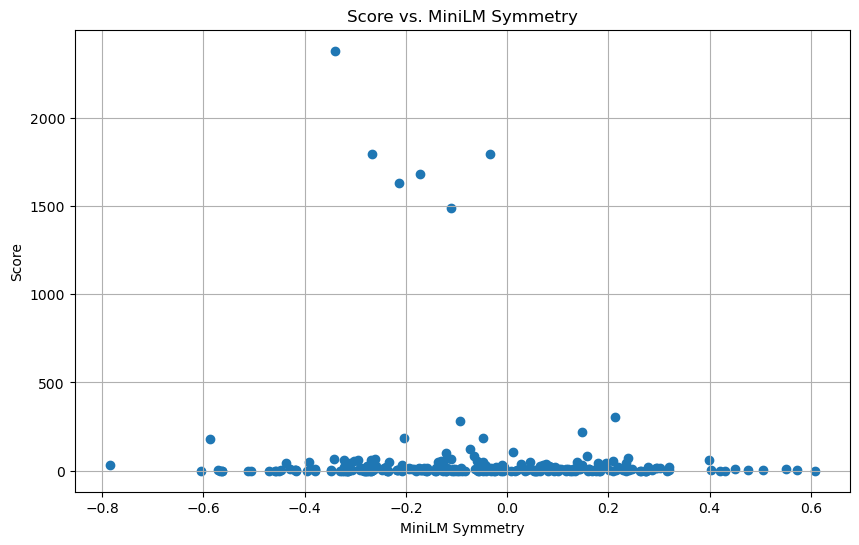

In [15]:
import matplotlib.pyplot as plt

# Plot the score values
plt.figure(figsize=(10, 6))
plt.scatter(jokes['minilm_symmetry'],jokes['score'])
plt.title('Score vs. MiniLM Symmetry')
plt.xlabel('MiniLM Symmetry')
plt.ylabel('Score')
plt.grid(True)
plt.show()


In [46]:
filtered_jokes = jokes[jokes['score'] > 1500]
filtered_jokes = filtered_jokes[filtered_jokes['minilm_symmetry'] < 0.1]
for row in filtered_jokes.itertuples():
    print(row.score, " - ", row.setup, row.punchline, " | symmetry: ", row.minilm_symmetry)

1795.0  -  What do you call a cheap circumcision?  A rip-off.  | symmetry:  -0.2670477479696274
1795.0  -  What do you call a cheap circumcision?  a rip off  | symmetry:  -0.0340973734855651
1680.0  -  What do you call it when batman skips church?  christian bale!  | symmetry:  -0.1728055868297815
1632.0  -  What is the hardest part about being a pedophile?  fitting in  | symmetry:  -0.2129546944051981
2379.0  -  How did the farmer find the sheep in the tall grass?  very satisfying.  | symmetry:  -0.3408368751406669


In [47]:
filtered_jokes = jokes[jokes['score'] < 10]
filtered_jokes = filtered_jokes[filtered_jokes['minilm_symmetry'] < 0.1]
for row in filtered_jokes.itertuples():
    print(row.score, " - ", row.setup, row.punchline, " | symmetry: ", row.minilm_symmetry)

3.0  -  Why did the radiologist break up with the gold digger?  because he saw right through her.  | symmetry:  -0.0546156093478202
0.0  -  Why did the melon plan a big elaborate wedding?  because he cantaloupe.  | symmetry:  -0.1259097754955291
0.0  -  How can you tell if someone got their dog from a shelter?  dont worry theyll let you know.  | symmetry:  -0.2768101245164871
5.0  -  What do you call a beaten up pretzel?  a salted pretzel  | symmetry:  -0.0414965450763702
6.0  -  What do you call an uneven body of water?  an inconsistensea.  | symmetry:  0.0510371923446655
1.0  -  What does a kangaroo and a banana have in common?  they both cant ride a bike.  | symmetry:  -0.088414154946804
1.0  -  Why did the mortgage broker go out of business?  ...because he lost interest.  | symmetry:  0.0523504018783569
0.0  -  What do you call five black cars that all crash into each other?  a three car pile-up.  | symmetry:  -0.1216428279876709
1.0  -  What lies at the bottom of the ocean and twi

# ======
# MINILM
# ======

In [37]:
subset_df = jokes[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'score_class']].copy()
data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']] 
target = subset_df['score_class']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=40)


# SVM

In [38]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.391304347826087
Précision:  0.15311909262759923
Recall:  0.391304347826087
F1-score:  0.22010869565217392
Confusion Matrix:
 [[0.         0.26086957 0.         0.         0.        ]
 [0.         0.39130435 0.         0.         0.        ]
 [0.         0.28804348 0.         0.         0.        ]
 [0.         0.02717391 0.         0.         0.        ]
 [0.         0.0326087  0.         0.         0.        ]]

Accuracy:  0.4177215189873418
Précision:  0.17449126742509213
Recall:  0.4177215189873418
F1-score:  0.24615732368896928
Confusion Matrix:
 [[0.         0.18987342 0.         0.        ]
 [0.         0.41772152 0.         0.        ]
 [0.         0.35443038 0.         0.        ]
 [0.         0.03797468 0.         0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.3804347826086957
Précision:  0.38521520418980204
Recall:  0.3804347826086957
F1-score:  0.33222892420163164
Confusion Matrix:
 [[0.07065217 0.16304348 0.         0.         0.02717391]
 [0.05434783 0.27173913 0.0326087  0.         0.0326087 ]
 [0.04347826 0.18478261 0.02173913 0.         0.03804348]
 [0.01086957 0.01086957 0.         0.         0.00543478]
 [0.00543478 0.01086957 0.         0.         0.01630435]]

Accuracy:  0.27848101265822783
Précision:  0.1751054852320675
Recall:  0.27848101265822783
F1-score:  0.21431689218681796
Confusion Matrix:
 [[0.01265823 0.11392405 0.02531646 0.         0.03797468]
 [0.12658228 0.26582278 0.01265823 0.         0.01265823]
 [0.05063291 0.26582278 0.         0.         0.03797468]
 [0.         0.03797468 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random forest

Best parameters: {'max_depth': 3, 'min_samples_split': 60, 'n_estimators': 5}
Best cross-validated accuracy: 0.424024024024024


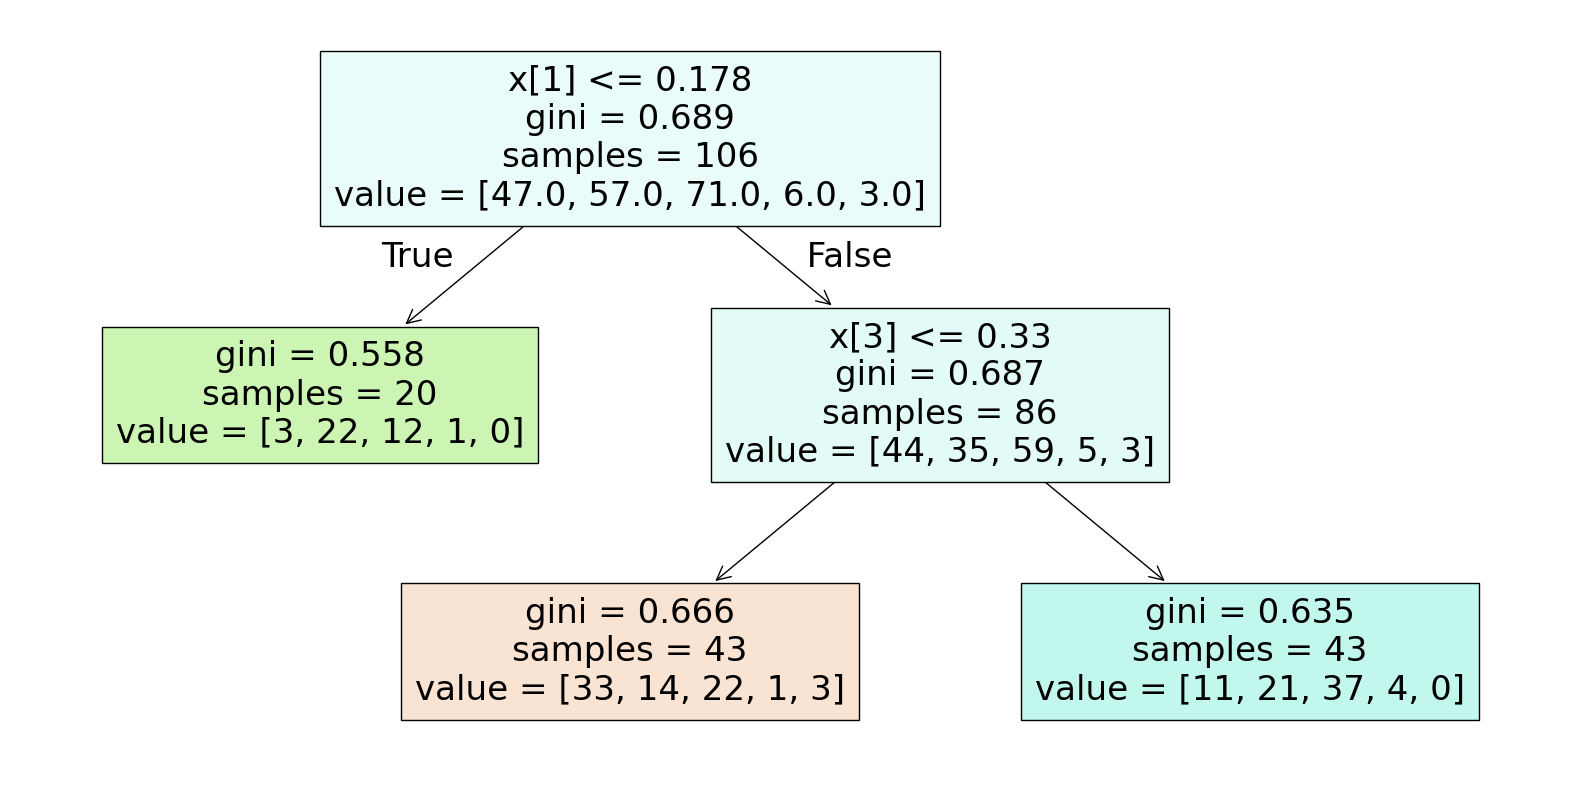

Accuracy:  0.43478260869565216
Précision:  0.47313664596273297
Recall:  0.43478260869565216
F1-score:  0.3440961930708993
Confusion Matrix:
 [[0.04891304 0.20108696 0.01086957 0.         0.        ]
 [0.01630435 0.35869565 0.01630435 0.         0.        ]
 [0.00543478 0.25543478 0.02717391 0.         0.        ]
 [0.00543478 0.02173913 0.         0.         0.        ]
 [0.         0.0326087  0.         0.         0.        ]]

Accuracy:  0.3670886075949367
Précision:  0.25738396624472576
Recall:  0.3670886075949367
F1-score:  0.24512285927029043
Confusion Matrix:
 [[0.01265823 0.16455696 0.01265823 0.        ]
 [0.01265823 0.35443038 0.05063291 0.        ]
 [0.         0.35443038 0.         0.        ]
 [0.         0.03797468 0.         0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# Regression

In [29]:
subset_df = jokes[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'score']].copy()
data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']]
target = subset_df['score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [ -84.77616715  -94.61094246 -179.38710961  -99.61067849]
Intercept: 173.0299505622946
Mean squared error: 7377.0094267614895
R² score: -2.04600302215384


# ======
# OPENAI
# ======

In [39]:
subset_df = jokes[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'score_class']].copy()
data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']] 
target = subset_df['score_class']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=40)


# SVM

In [40]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.391304347826087
Précision:  0.15311909262759923
Recall:  0.391304347826087
F1-score:  0.22010869565217392
Confusion Matrix:
 [[0.         0.26086957 0.         0.         0.        ]
 [0.         0.39130435 0.         0.         0.        ]
 [0.         0.28804348 0.         0.         0.        ]
 [0.         0.02717391 0.         0.         0.        ]
 [0.         0.0326087  0.         0.         0.        ]]

Accuracy:  0.4177215189873418
Précision:  0.17449126742509213
Recall:  0.4177215189873418
F1-score:  0.24615732368896928
Confusion Matrix:
 [[0.         0.18987342 0.         0.        ]
 [0.         0.41772152 0.         0.        ]
 [0.         0.35443038 0.         0.        ]
 [0.         0.03797468 0.         0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.40217391304347827
Précision:  0.3702779970502088
Recall:  0.40217391304347827
F1-score:  0.36503545759878053
Confusion Matrix:
 [[0.07065217 0.14673913 0.04347826 0.         0.        ]
 [0.08152174 0.27173913 0.03804348 0.         0.        ]
 [0.07608696 0.15217391 0.05978261 0.         0.        ]
 [0.01086957 0.01630435 0.         0.         0.        ]
 [0.01086957 0.02173913 0.         0.         0.        ]]

Accuracy:  0.379746835443038
Précision:  0.3589445271779598
Recall:  0.379746835443038
F1-score:  0.35155883731833093
Confusion Matrix:
 [[0.07594937 0.10126582 0.01265823 0.        ]
 [0.07594937 0.24050633 0.10126582 0.        ]
 [0.05063291 0.24050633 0.06329114 0.        ]
 [0.01265823 0.02531646 0.         0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random forest

Best parameters: {'max_depth': 2, 'min_samples_split': 25, 'n_estimators': 10}
Best cross-validated accuracy: 0.44564564564564557


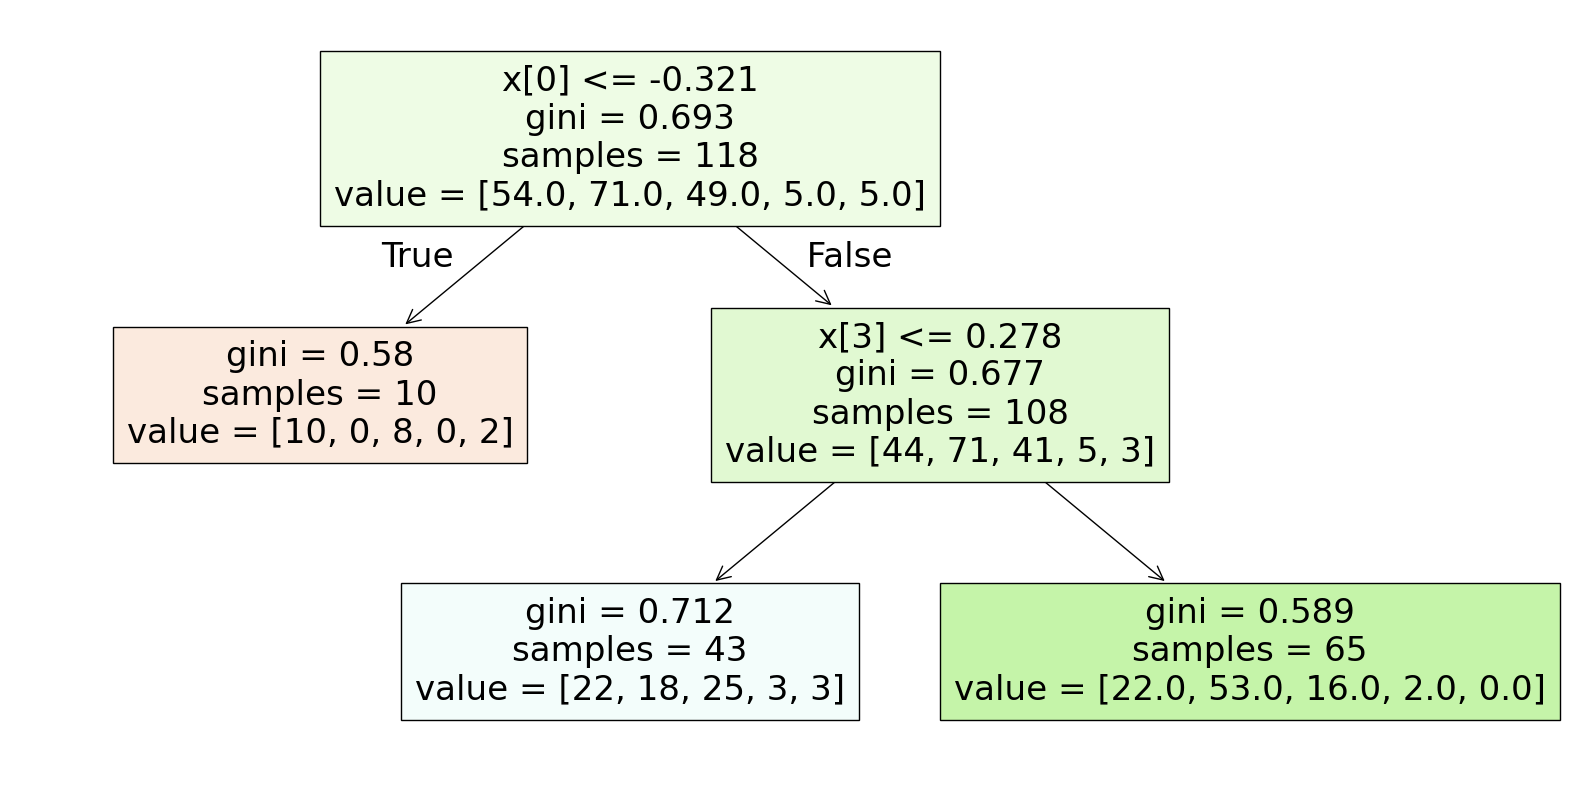

Accuracy:  0.483695652173913
Précision:  0.45337639151438774
Recall:  0.483695652173913
F1-score:  0.4413146980202877
Confusion Matrix:
 [[0.06521739 0.14130435 0.05434783 0.         0.        ]
 [0.00543478 0.31521739 0.07065217 0.         0.        ]
 [0.04347826 0.14130435 0.10326087 0.         0.        ]
 [0.         0.01630435 0.01086957 0.         0.        ]
 [0.01086957 0.01630435 0.00543478 0.         0.        ]]

Accuracy:  0.3670886075949367
Précision:  0.2827738029719318
Recall:  0.3670886075949367
F1-score:  0.31056093323405315
Confusion Matrix:
 [[0.         0.15189873 0.03797468 0.        ]
 [0.         0.26582278 0.15189873 0.        ]
 [0.         0.25316456 0.10126582 0.        ]
 [0.01265823 0.02531646 0.         0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# Regression

In [34]:
subset_df = jokes[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'score']].copy()
data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']]
target = subset_df['score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [ 20774.16389313  20860.14864847  41634.3125416  -62581.65569512]
Intercept: 91.01759091394776
Mean squared error: 5172.598016331566
R² score: -1.1357908440479911
